In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc, precision_score, recall_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from numpy import arange
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

In [4]:
benign_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample.csv')
benign_df.head(2)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,15.854422,-0.343690,-0.086569,0.096351,0.142000,0.002723,0.706619,1.982467,1.798333,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,1
1,-0.060352,5.598377,2.253048,4.681794,3.829148,0.125465,3.569438,-0.039001,2.481753,5.125594,...,-0.059807,1.103561,0.162506,0.515708,1.673959,6.184780,12.942534,8.511326,2.479016,1


In [5]:
ddos_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\DDoS_resample_300.csv')
ddos_df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0.019544,-0.034902,-0.014359,-0.005940,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
1,0.021072,-0.013958,-0.002917,-0.004205,3.893615,-0.001653,4.111989,4.113596,4.114187,-0.008236,...,-3.073348,-0.001168,-0.000797,-0.001254,-0.000998,-0.012431,-0.001560,-0.012326,-0.012412,-1
2,-0.060352,-0.344946,-0.086569,-0.154149,-0.037724,-0.006439,-0.046063,-0.039001,-0.049093,-0.034669,...,-0.059807,-0.095769,-0.109896,-0.112787,-0.020891,-0.339324,-0.282883,-0.341153,-0.315336,-1
3,0.019544,-0.034901,-0.014359,-0.005940,0.292062,-0.003071,1.153700,1.486555,1.495316,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
4,0.019544,-0.034870,-0.014359,-0.005940,-0.313988,-0.003071,-1.133147,-1.443693,-1.456248,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,0.019544,-0.034902,-0.014359,-0.005940,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1
287,2.209517,-0.326647,0.739653,-0.339661,3.895092,-0.010439,3.419951,3.435842,3.442692,1.576146,...,0.063244,-0.098072,-0.107270,-0.109441,-0.015768,-0.315335,-0.268473,-0.315664,-0.295924,-1
288,0.025978,-0.119415,-0.495813,-0.005438,-0.502426,-0.002646,-0.165788,0.557290,0.314939,-0.951297,...,0.151105,-0.004773,-0.003397,-0.005162,-0.004036,-0.007978,-0.002093,-0.007954,-0.007811,-1
289,0.019544,-0.034902,-0.014359,-0.005940,-0.010963,-0.003071,0.010276,0.021431,0.019534,-0.009313,...,0.155863,-0.003031,-0.001923,-0.003225,-0.002593,-0.034464,-0.002979,-0.034487,-0.034441,-1


In [6]:
benign_test_df = pd.read_csv(r'D:\Kuliah\ProyekAkhir\New Data\resample\Benign_resample_4000.csv')

In [7]:
df = pd.concat([benign_df, benign_test_df, ddos_df], ignore_index=True)
X = df.drop([' Label'], axis=1)
y = df[' Label']

In [8]:
from scipy.spatial.distance import cdist, euclidean, pdist
from sklearn.cluster import KMeans

class OutlierDetection:
  def __init__(self, benign=None, cluster_n=None):
    if isinstance(benign, pd.DataFrame):
        data = benign.values
    else:
        data = benign
    self.benign = data
    self.cluster_n = cluster_n
    self.kmeans = KMeans(n_clusters=self.cluster_n).fit(self.benign)
    
  def cluster(self):
    labels = self.kmeans.labels_
    centroids = self.kmeans.cluster_centers_
    print(labels)
    
    averaged = dict(enumerate(centroids, 0))
    dic= {label: self.benign[labels==label] for label in np.unique(labels)}
    avgDistance = {}
    for i in dic:
      distance = []
      for j in dic[i]:
        distance.append(euclidean(j, averaged[i]))
      avgDistance[i] = np.average(distance)
    
    return avgDistance, averaged
  
  def predict(self, ddos=None):      
    davg, averaged = self.cluster()
    
    anomaly = []
    if isinstance(ddos, pd.DataFrame):
        data = ddos.values
    else:
        data = ddos
        
    for i in data:
        labels = self.kmeans.predict([i])
        dist = euclidean(i, averaged[labels[0]])
        if dist <= davg[labels[0]]:
            anomaly.append(1)
        else:
            anomaly.append(-1) 
    return anomaly  

In [9]:
for i in range(1, 3):
    clf = OutlierDetection(benign=X, cluster_n=i)
    y_pred_test = clf.predict(X)
    print('Cluster : ' + str(i))
    print('---Classification Report---')
    print(classification_report(y, y_pred_test))

[0 0 0 ... 0 0 0]
Cluster : 1
---Classification Report---
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       291
           1       0.98      0.78      0.87     16010

    accuracy                           0.76     16301
   macro avg       0.49      0.39      0.43     16301
weighted avg       0.96      0.76      0.85     16301

[0 0 0 ... 0 0 0]
Cluster : 2
---Classification Report---
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       291
           1       0.97      0.65      0.78     16010

    accuracy                           0.64     16301
   macro avg       0.49      0.33      0.39     16301
weighted avg       0.96      0.64      0.77     16301



In [19]:
for i in range(1, 15):
    clf = OutlierDetection(benign=X, cluster_n=i)
    y_pred_test = clf.predict(X)
    print('Cluster : ' + str(i))
    print('---Classification Report---')
    print(classification_report(y, y_pred_test))

Cluster : 1
---Classification Report---
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       291
           1       0.98      0.78      0.87     16010

    accuracy                           0.76     16301
   macro avg       0.49      0.39      0.43     16301
weighted avg       0.96      0.76      0.85     16301

Cluster : 2
---Classification Report---
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       291
           1       0.97      0.65      0.78     16010

    accuracy                           0.64     16301
   macro avg       0.49      0.33      0.39     16301
weighted avg       0.96      0.64      0.77     16301

Cluster : 3
---Classification Report---
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       291
           1       0.97      0.65      0.78     16010

    accuracy                           0.64     16301
   macro

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans

distortions = []
K = range(1, 30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

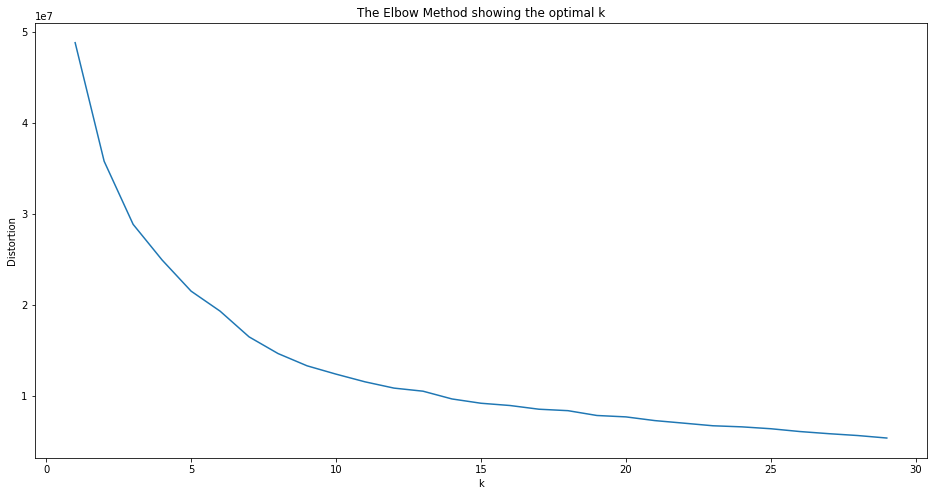

In [20]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()